In [ ]:
#hw3
#Руслан Файзелханов
#рейтинги
#ПО:  PostgreSQL, Python3 (дистрибутив Anaconda)
#для выполнения задания данные загружены на сервер PostgreSQL в базу данных "postgres"

In [ ]:
#задание 1

In [ ]:
#Откройте Anaconda Prompt и выполните следующию команду (команду также можно выполнить из ячейки Jupyter):
# pip install psycopg2
#(для MacOS):
# pip install psycopg2-binary

In [1]:
#загрузка библиотек, которые могут быть задействованы при выполнении выполнении задания
import psycopg2
import getpass
import pandas as pd

In [2]:
#создание соединение

#пользовательские параметры PostgreSQL
user1 = 'postgres'
database1 = 'postgres'
host1 = 'localhost'
port1 = '5432'

#пользователю необходимо ввести пароль от своей базы данных
conn=psycopg2.connect(user=user1,
                     database = database1,
                     host = host1,
                     port=port1,
                     password=getpass.getpass('Insert password: ')
                         )
print(conn.get_dsn_parameters())
#в результате должны быть показаны параметры соединения

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [3]:
#запрос необходимой информации

#пользовательские параметры
ratings = 'ratings_task' #в кавычках название таблицы из SQL с инфо об изменении рейтинга

#запрос
query_ratings = "SELECT * FROM " +str(ratings)
ratings = pd.read_sql_query(query_ratings,conn)
ratings.head(10)
#в результате показаны первые 10 строк БД
#замечание: колонка exp_scale, соответствующая рейтинговой шкале Exp (переводящая буквенный рейтинг в числовой,
#если принадлежит Exp), была добавлена в SQL

,rat_id,grade,outlook,change,date,rating_id_foreign,emitent_id_foreign,exp_scale
0,82,Снят,None,снят,2016-05-26,80,2,NaN
1,82,A+,стабильный,подтвержден,2015-07-06,80,2,NaN
2,82,A+,None,установлен,2014-05-29,80,2,NaN
3,41,1,None,подтвержден,2015-11-17,38,3,NaN
4,41,1,None,подтвержден,2014-11-21,38,3,NaN
5,41,1,None,установлен,2013-12-02,38,3,NaN
6,42,A-,None,подтвержден,2015-11-17,39,3,NaN
7,42,A-,None,установлен,2014-11-21,39,3,NaN
8,43,a,None,подтвержден,2015-11-17,40,3,NaN
9,43,a,None,установлен,2014-11-21,40,3,NaN


In [4]:
#пользовательские параметры
emitent = 'emitent_info' #в кавычках название таблицы из SQL с инфо об эмитенте

#запрос
query_emitents = "SELECT * FROM " +str(emitent)
emitents = pd.read_sql_query(query_emitents,conn)
emitents.head(10)
#в результате показаны первые 10 строк БД

,emitent_id,ent_name,okpo,ogrn,inn,finst,event_id_foreign
0,1,1-й НПФ,45069851,1.147799e+12,7.718003e+09,97112.0,NaN
1,2,250 ЗЖБИ,7645823,1.025006e+12,5.043017e+09,97231.0,NaN
2,3,Bank of Tokyo-Mitsubishi,47359323,NaN,9.909016e+09,6094.0,NaN
3,4,BSTDB Bank,20000000,NaN,9.909361e+09,7480.0,NaN
4,5,Kazkommerts Int,9804272,NaN,NaN,93912.0,NaN
5,6,M&S Дилерская фирма ИК,32999941,1.025001e+12,5.005007e+09,92003.0,NaN
6,7,А ПЛЮС ПАРК КОЛПИНО,52145162,1.127848e+12,7.810895e+09,87094.0,NaN
7,8,Абсолют Cтрахование,11693986,1.027700e+12,7.728179e+09,90997.0,NaN
8,9,Абсолют Банк,17527415,1.027700e+12,7.736047e+09,86155.0,NaN
9,10,Авангард-Агро,71960904,1.045736e+12,5.722033e+09,95411.0,NaN


In [5]:
#пользовательские параметры
credit_event = 'credit_events_task' #в кавычках название таблицы из SQL с инфо о банкротствах и ликвидациях 

#запрос
query_events = "SELECT * FROM " +str(credit_event)
events = pd.read_sql_query(query_events,conn)
events.head(10)
#в результате показаны первые 10 строк БД

,inn,date,event,id_serial
0,3664036384,2011-12-21,lqd,1
1,7704010544,2015-09-11,dft,2
2,3731001982,2016-03-03,dft,3
3,5406102877,2011-01-14,lqd,4
4,7730040030,2016-02-08,dft,5
5,7722004494,2011-07-21,dft,6
6,7710036614,2015-09-24,dft,7
7,6731035419,2013-12-24,dft,8
8,274061157,2014-04-17,dft,9
9,7834002576,2014-08-20,dft,10


In [6]:
#склеиваются необходимые данные из таблиц ratings и emitents
data = ratings[['grade', 'change', 'date', 'exp_scale', 'emitent_id_foreign']].merge(emitents[['ent_name', 'event_id_foreign', 'emitent_id']], 
                                                               'left', left_on='emitent_id_foreign', right_on='emitent_id')

#исключаются рейтинги не от агенства EXP
data = data.dropna(subset=['exp_scale'])
#добавение в ДФ инфо о дефолтах и ликвидациях
data = data.merge(events, 'left', left_on = 'event_id_foreign', right_on = 'id_serial')


data2 = data
#сортирока от новых дат к старым
data2 = data2.sort_values(by = ['ent_name', 'date_x'], ascending=False)
#установление формата datetime в колонках с датами
data2['date_x'] = pd.to_datetime(data2['date_x'])
data2['date_y'] = pd.to_datetime(data2['date_y'])

from datetime import datetime
date_end_str = '06-30-2015' #указать в формате mm-dd-yyyy в кавычках
date_end = datetime.strptime(date_end_str, '%m-%d-%Y')

data2 =  data2[data2['date_x'] <= date_end]
#значения группируются по ent_name таким образом, что остаются только наиболее актуальные рейтинги на выбранную дату
data3 = data2.groupby('ent_name').first()
data3['ent_name'] = data3.index
data3 = data3.sort_values(by = ['ent_name'], ascending=False)

import numpy as np
#вспомогательный датафрейм
data4 = pd.DataFrame(data3[['ent_name', 'date_x', 'exp_scale', 'date_y', 'event']], 
                     columns = [['ent_name', 'date_x', 'exp_scale', 'date_y', 'event']])
#задается числовой индекс и новые названия колонок
data4.index = np.arange(0, len(data4))
data4.columns = ['ent_name', 'date_end', 'exp_scale', 'date_event', 'event']

date_start_str = '01-01-2011' #указать в формате mm-dd-yyyy
date_start = datetime.strptime(date_start_str, '%m-%d-%Y')

#отсеиваются изменения рейтингов, которые произошли после выбранного начала периода
data5 = data2[data2['date_x'] <= date_start]
#данные группируются по ent_name таким образом, чтобы на начало периода была только актуальная информация
data5 = data5.groupby('ent_name').first()
data5['ent_name'] = data5.index
data5 = data5.sort_values(by = ['ent_name'], ascending=False)
data5 = data5.drop(data5[data5.date_x > data5.date_y].index) #строки, где рейтинг менялся после объявления
#о дефолте или ликидации удаляются, так как их наличие приведет к смещению в расчетах
data5 = data5.drop(['grade', 'change', 'emitent_id_foreign', 'event_id_foreign', 'inn', 'date_y',
                   'event', 'id_serial', 'emitent_id'], axis=1)
data5.index = np.arange(0, len(data5))
data5.columns = ['date_start', 'exp_scale', 'ent_name']

data6 = data5.merge(data4, 'left', left_on='ent_name', right_on='ent_name')

data7 = data6
data7['exp_scale_x'] = data7['exp_scale_x'].astype(int)
data7['exp_scale_y'] = data7['exp_scale_y'].astype(int)
#удаляются рейтинги статус которых "Снят (999)" или "Приостановлен (888)"
data7 = data7[data7['exp_scale_y'] < 777]
data7 = data7[data7['exp_scale_x'] < 777]
#удяляются ликвидированные без банкротства предприятия
data7[data7['event']!='lqd']


#создание новых колонок

#значение в колонке 'status' = 'default', если рейтинг равен 9 или 10, а также если дефолт указан в событии
data7['default'] = 0
data7['non-default'] = 0
data7.loc[data7['exp_scale_y'] >= 9, 'default'] = 1
data7.loc[data7['event'] == 'dft', 'default'] = 1
#значение в колонке 'status' = 'non_default', если дефолта не было
data7.loc[data7['default'] == 0, 'non-default'] = 1

data7.head()
#результат первые строки датафрема, необходимого для создания итоговой таблицы

,date_start,exp_scale_x,ent_name,date_end,exp_scale_y,date_event,event,default,non-default
1,2009-12-24,2,Южурал-АСКО СК,2015-06-11,2,NaT,NaN,0,1
5,2010-01-27,2,ЮЖУРАЛЖАСО,2015-03-20,2,NaT,NaN,0,1
7,2010-11-03,3,Энерготрансбанк КБ,2014-12-19,1,NaT,NaN,0,1
8,2010-04-23,4,Энергомашбанк,2015-05-20,2,NaT,NaN,0,1
9,2010-02-26,3,Энергобанк АКБ,2015-04-03,2,NaT,NaN,0,1


In [7]:
data8 = data7.groupby(['exp_scale_x']).agg({'non-default':'sum','default':'sum'})
data8['exp_scale'] = data8.index

data8

,non-default,default,exp_scale
exp_scale_x,,,
0,35,0,0
1,23,1,1
2,41,3,2
3,45,9,3
4,9,5,4
5,1,0,5


In [8]:
#пользовательские параметры
exp_scale = 'scale_exp_task' #в кавычках название таблицы из SQL с инфо о шкале рейтинга агентства Эксперт 

#запрос
query_events = "SELECT * FROM " +str(exp_scale)
scale = pd.read_sql_query(query_events,conn)
scale
#в результате показана выгруженная таблица

,grade,grade_id
0,A++,0
1,A+,1
2,A,2
3,B++,3
4,B+,4
5,B,5
6,C++,6
7,C+,7
8,C,8
9,D,9


In [9]:
#удаляем наблюдения "снят" и "приостановлен", так как они удалены в таблице data
scale = scale[scale['grade_id'] < 777]
scale

,grade,grade_id
0,A++,0
1,A+,1
2,A,2
3,B++,3
4,B+,4
5,B,5
6,C++,6
7,C+,7
8,C,8
9,D,9


In [42]:
distrib = scale.merge(data8, 'left', left_on = 'grade_id', right_on = 'exp_scale')
distrib

,grade,grade_id,non-default,default,exp_scale
0,A++,0,35.0,0.0,0.0
1,A+,1,23.0,1.0,1.0
2,A,2,41.0,3.0,2.0
3,B++,3,45.0,9.0,3.0
4,B+,4,9.0,5.0,4.0
5,B,5,1.0,0.0,5.0
6,C++,6,NaN,NaN,NaN
7,C+,7,NaN,NaN,NaN
8,C,8,NaN,NaN,NaN
9,D,9,NaN,NaN,NaN


In [43]:
#удаляется избыточная колонка exp_scale
#вместо NaN заполняются  0
distrib = distrib.drop('exp_scale', 1)
distrib = distrib.fillna(0)

distrib

,grade,grade_id,non-default,default
0,A++,0,35.0,0.0
1,A+,1,23.0,1.0
2,A,2,41.0,3.0
3,B++,3,45.0,9.0
4,B+,4,9.0,5.0
5,B,5,1.0,0.0
6,C++,6,0.0,0.0
7,C+,7,0.0,0.0
8,C,8,0.0,0.0
9,D,9,0.0,0.0


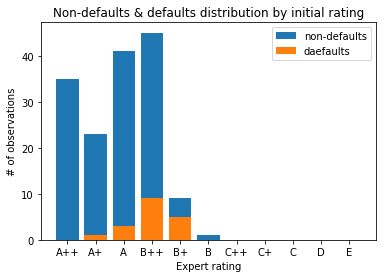

In [49]:
#задание 2
distrib['non-default'] = distrib['non-default'].astype(int)
distrib['default'] = distrib['default'].astype(int)
distrib['grade'] = distrib['grade'].astype(str)

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(distrib['grade_id'], distrib['non-default'])
ax.bar(distrib['grade_id'], distrib['default'])
ax.set_xticks(distrib['grade_id'])
ax.set_xticklabels(distrib['grade'])
ax.set_ylabel('# of observations')
ax.set_xlabel('Expert rating')
ax.set_title('Non-defaults & defaults distribution by initial rating')
ax.legend(['non-defaults', 'daefaults'])

plt.show()

In [50]:
#задание 3
#добавление необходимых колонок в таблицу

#эмпирическая функция распределения недефолтеров
distrib['prob_nondef'] = (distrib['non-default'].cumsum(axis = 0))/(distrib['non-default'].sum(axis = 0))
#эмпирическая функция распределения дефолтеров
distrib['prob_def'] = (distrib['default'].cumsum(axis = 0))/(distrib['default'].sum(axis = 0))

distrib

,grade,grade_id,non-default,default,prob_nondef,prob_def
0,A++,0,35,0,0.227273,0.000000
1,A+,1,23,1,0.376623,0.055556
2,A,2,41,3,0.642857,0.222222
3,B++,3,45,9,0.935065,0.722222
4,B+,4,9,5,0.993506,1.000000
5,B,5,1,0,1.000000,1.000000
6,C++,6,0,0,1.000000,1.000000
7,C+,7,0,0,1.000000,1.000000
8,C,8,0,0,1.000000,1.000000
9,D,9,0,0,1.000000,1.000000


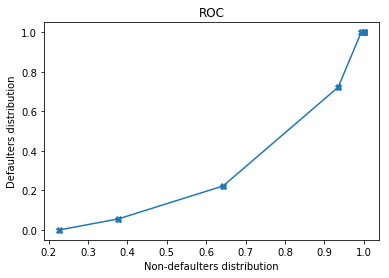

In [58]:
fig2, ax2 = plt.subplots()
ax2.plot(distrib['prob_nondef'], distrib['prob_def'], marker = 'X')
ax2.set_xlabel('Non-defaulters distribution')
ax2.set_ylabel('Defaulters distribution')
ax2.set_title('ROC')

plt.show()